In [1]:
# Given data of flowers
# Data available is sepal-length, sepal-width, petal-length and petal-width

In [2]:
import pandas as pd
import numpy as np

In [6]:
path = "C:\\Users\\--YOUR TEXT FILE PATH HERE\\data.txt"

In [7]:
names = ['sepal-length','sepal-width','petal-length','petal-width']

In [8]:
dataset = pd.read_csv(path, names=names)

In [9]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
from sklearn.cluster import KMeans

In [32]:
# Using the elbow method to find the optimal number of clusters 

from sklearn.cluster import KMeans
w = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init ='k-means++', max_iter = 300, n_init = 10, random_state =3)
    kmeans.fit(dataset)
    w.append(kmeans.inertia_)

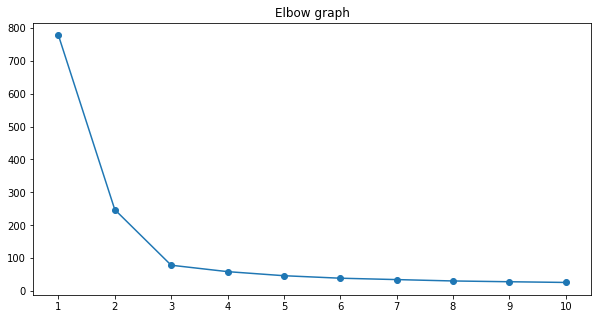

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(range(1,11), w,marker = 'o')
plt.title('Elbow graph')
plt.xticks(range(1,11))

plt.show()

In [34]:
#Found the optimal number of cluster(n_cluster) which is 3
#Further reading: https://medium.com/data-py-blog/k-means-clustering-in-python-4fc8caa0e0d9

In [35]:
#apply k means algorithm to datasets
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter=300, n_init=30, random_state = 3)

In [36]:
#obtain predicted values
pred = kmeans.fit_predict(dataset)

In [37]:
#view predicted values
#All flowers now group into 3 cluster (0,1, and 2)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [38]:
#Combine prediction data to datset as 'Class' of flower
dataset['Class'] = pred

In [39]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


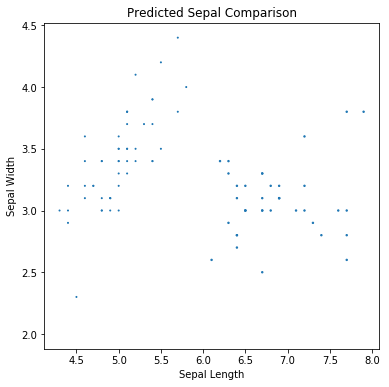

In [40]:
#PLot scatter graph of the predicted cluster of flower
plt.figure(figsize=(6,6))
plt.scatter(dataset['sepal-length'],dataset['sepal-width'],dataset['Class'])

plt.title('Predicted Sepal Comparison')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [41]:
#Group by cluster
Group1_predicted = dataset[dataset['Class'] == 0]
Group2_predicted = dataset[dataset['Class'] == 1]
Group3_predicted = dataset[dataset['Class'] == 2]

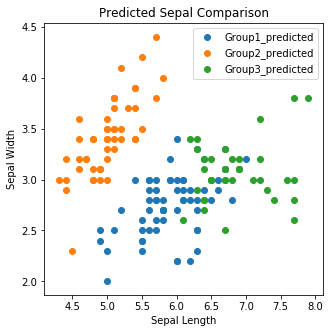

In [42]:
plt.figure(figsize=(5,5))
plt.scatter(Group1_predicted['sepal-length'],Group1_predicted['sepal-width'], label='Group1_predicted')
plt.scatter(Group2_predicted['sepal-length'],Group2_predicted['sepal-width'], label='Group2_predicted')
plt.scatter(Group3_predicted['sepal-length'],Group3_predicted['sepal-width'], label='Group3_predicted')

plt.title('Predicted Sepal Comparison')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(loc='upper right')

plt.show()

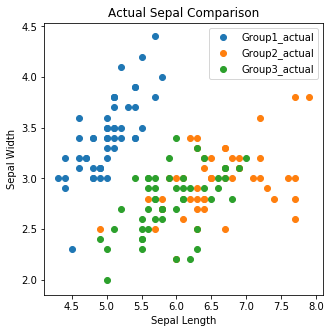

In [43]:
#We clustered the flowers based on ther sepal size
#Then, we can compared it to the original data with already flower group

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length','sepal-width','petal-length','petal-width','Class']
dataset2 = pd.read_csv(url, names=names)

Group1_actual = dataset2[dataset2['Class'] == 'Iris-setosa']
Group2_actual = dataset2[dataset2['Class'] == 'Iris-virginica']
Group3_actual = dataset2[dataset2['Class'] == 'Iris-versicolor']

plt.figure(figsize=(5,5))
plt.scatter(Group1_actual['sepal-length'], Group1_actual['sepal-width'], label='Group1_actual')
plt.scatter(Group2_actual['sepal-length'], Group2_actual['sepal-width'], label='Group2_actual')
plt.scatter(Group3_actual['sepal-length'], Group3_actual['sepal-width'], label='Group3_actual')

plt.title('Actual Sepal Comparison')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(loc='upper right')

actual_plot = plt.show()

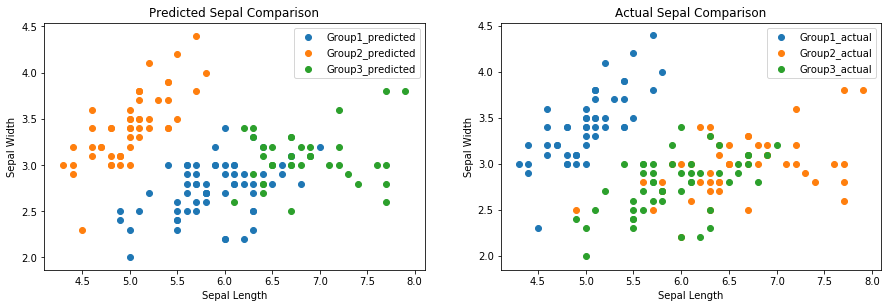

In [44]:
#Compare side by side (sepal)

#predicted
plt.figure(figsize=(15,10))
plt.subplot(221)

plt.scatter(Group1_predicted['sepal-length'],Group1_predicted['sepal-width'], label='Group1_predicted')
plt.scatter(Group2_predicted['sepal-length'],Group2_predicted['sepal-width'], label='Group2_predicted')
plt.scatter(Group3_predicted['sepal-length'],Group3_predicted['sepal-width'], label='Group3_predicted')


plt.title('Predicted Sepal Comparison')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(loc='upper right')

#actual

plt.subplot(222)


plt.scatter(Group1_actual['sepal-length'], Group1_actual['sepal-width'], label='Group1_actual')
plt.scatter(Group2_actual['sepal-length'], Group2_actual['sepal-width'], label='Group2_actual')
plt.scatter(Group3_actual['sepal-length'], Group3_actual['sepal-width'], label='Group3_actual')

plt.title('Actual Sepal Comparison')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(loc='upper right')

plt.show()

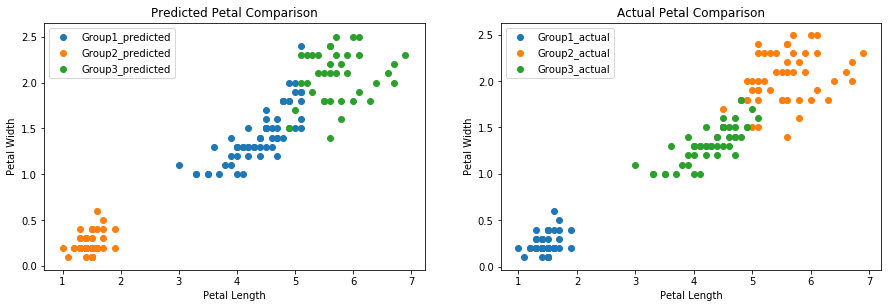

In [45]:
#Compare side by side (petal)

#predicted
plt.figure(figsize=(15,10))
plt.subplot(221)

plt.scatter(Group1_predicted['petal-length'],Group1_predicted['petal-width'], label='Group1_predicted')
plt.scatter(Group2_predicted['petal-length'],Group2_predicted['petal-width'], label='Group2_predicted')
plt.scatter(Group3_predicted['petal-length'],Group3_predicted['petal-width'], label='Group3_predicted')


plt.title('Predicted Petal Comparison')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(loc='upper left')

#actual

plt.subplot(222)


plt.scatter(Group1_actual['petal-length'], Group1_actual['petal-width'], label='Group1_actual')
plt.scatter(Group2_actual['petal-length'], Group2_actual['petal-width'], label='Group2_actual')
plt.scatter(Group3_actual['petal-length'], Group3_actual['petal-width'], label='Group3_actual')

plt.title('Actual Petal Comparison')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(loc='upper left')

Group1_predicted = dataset[dataset['Class'] == 0]
Group2_predicted = dataset[dataset['Class'] == 1]
Group3_predicted = dataset[dataset['Class'] == 2]
plt.show()

In [46]:
# From the dataset, compare the actual and predicted data
# convert the actual datastring to numerical

# Group1_predicted  == 0
# Group2_predicted  == 1
# Group3_predicted  == 2

# Group1_actual = 'Iris-setosa']
# Group2_actual = 'Iris-virginica']
# Group3_actual = 'Iris-versicolor']

# Convert actual 'class' to numerical
# Group1_actual --> Group2_predicted
# Group2_actual --> Group3_predicted
# Group3_actual --> Group1_predicted


In [47]:
actual = []
for i in dataset2['Class']:
    if i == 'Iris-setosa':
        actual.append(1)
        
    elif i == 'Iris-virginica':
        actual.append(2)
            
    else:
        actual.append(0)

In [48]:
#calculate accuracy of model using scikit learn function
from sklearn.metrics import accuracy_score
accuracy_score(actual, pred)

0.8933333333333333

In [49]:
#Accuracy: 89%